In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

In [5]:
#TODO once the values are set there is a more clean way of not splitting everything into chi

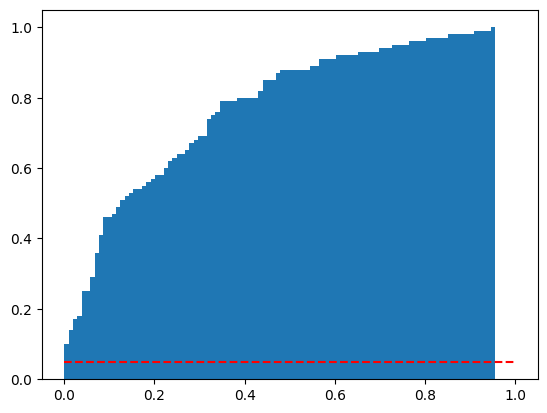

In [29]:
number_of_simulations = 100
alpha = 0.05    # significance level

T = 10000     # measuring time in seconds
DeltaT = 2e-9   # coincidence window in seconds
mu_1A = 1000      # rate of gamma_1 events in detector A in Hz
mu_2A = 1000     # rate of gamma_2 events in detector A in Hz

N_alpha = 100
N_beta  = 100
N_gamma = 100
N_delta = 100


# calculate rate of gamma_i events in detector B using maximum likelihood estimation
mu_1B = (N_gamma + N_delta) / (T * DeltaT * (mu_1A + mu_2A))
mu_2B = (N_beta + N_delta) / (T * DeltaT * (mu_1A + mu_2A))

# calculate coincidence rates
nu_alpha = mu_1A * mu_2B * DeltaT
nu_beta  = mu_2A * mu_2B * DeltaT
nu_gamma = mu_1A * mu_1B * DeltaT
nu_delta = mu_2A * mu_1B * DeltaT

nu_random = np.array([nu_alpha, nu_beta, nu_gamma, nu_delta])


# generate random samples from a Poisson distribution
rng = np.random.default_rng()
samples = rng.poisson(lam=T*nu_random, size=(number_of_simulations, 4))
samples_alpha = samples[:, 0]
samples_beta  = samples[:, 1]
samples_gamma = samples[:, 2]
samples_delta = samples[:, 3]


def poisson_pdf(k, lam):
    log_pdf = k * np.log(lam) - lam - np.log(factorial(k))
    return np.exp(log_pdf)

def Lambda(k_alpha, k_beta, k_gamma, k_delta):
    Lambda_alpha = poisson_pdf(k_alpha, T*nu_alpha)/poisson_pdf(k_alpha, k_alpha)
    Lambda_beta  = poisson_pdf(k_beta, T*nu_beta)/poisson_pdf(k_beta, k_beta)
    Lambda_gamma = poisson_pdf(k_gamma, T*nu_gamma)/poisson_pdf(k_gamma, k_gamma)
    Lambda_delta = poisson_pdf(k_delta, T*nu_delta)/poisson_pdf(k_delta, k_delta)
    out = Lambda_alpha * Lambda_beta * Lambda_gamma * Lambda_delta
    return out

# calculate Lambda
Lambda = Lambda(samples_alpha, samples_beta, samples_gamma, samples_delta)
plt.hist(Lambda, density=True, cumulative=True, bins=100)
plt.hlines(alpha, 0, 1, colors='r', linestyles='dashed')

plt.show()